In [4]:
## Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
#Data Collection and Processing
df= pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
## Rows and columns in the dataset
df.shape

(303, 14)

In [10]:
## Printing the first 5 rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
## Printing the last 5 rows of the dataset
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [12]:
## Checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
## Finding statistical measures about the dataset like count , min, std, max
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
## Checking the distribution of target variable
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

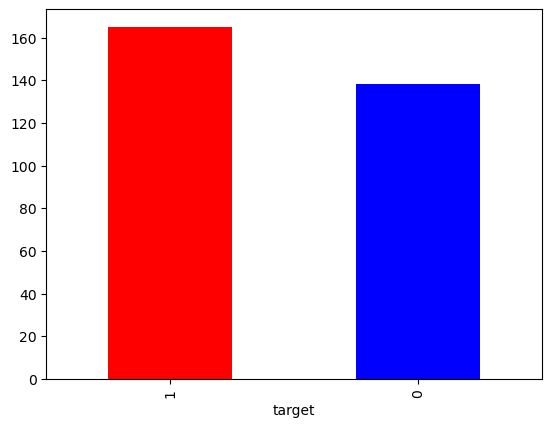

In [17]:
df["target"].value_counts().plot(kind="bar", color=["red","blue"])
plt.show()

In [18]:
#Heart disease frequency according to sex
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [19]:
#Compare the target column to the sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


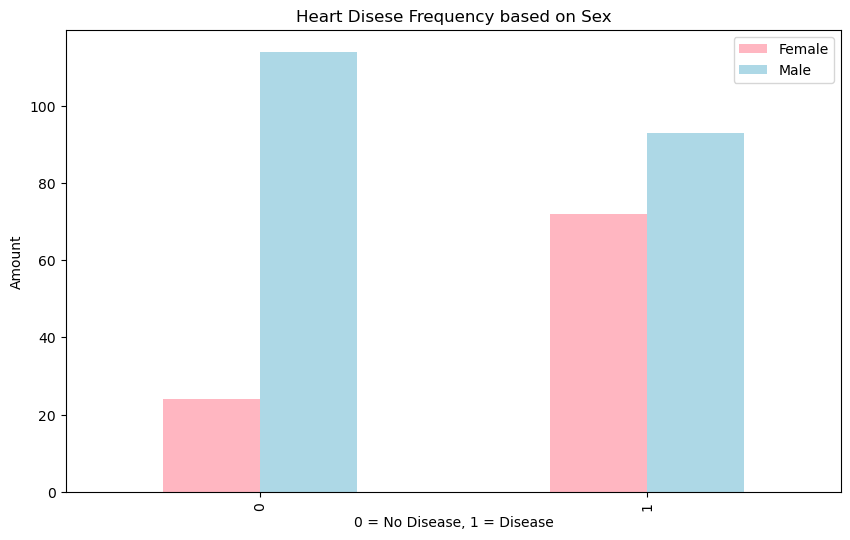

In [21]:
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["lightpink","lightblue"])
plt.title("Heart Disese Frequency based on Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.show()

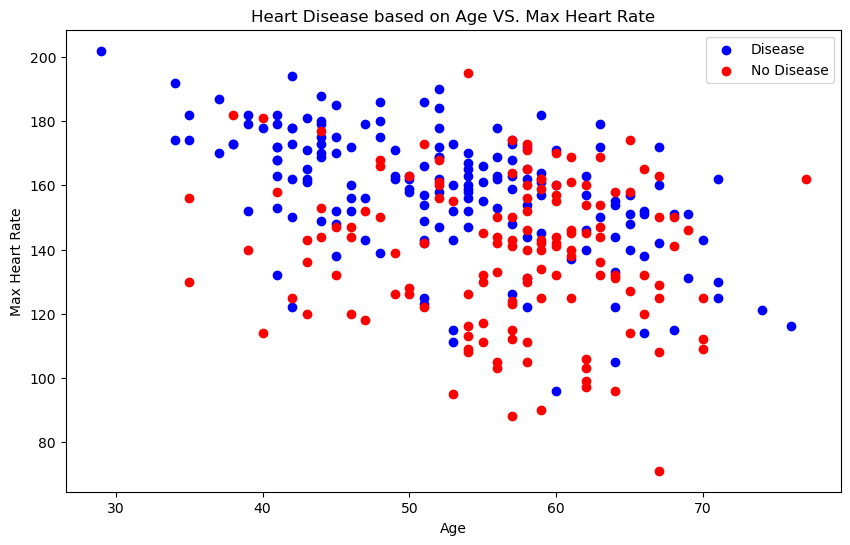

In [22]:
#Age vs Heart Rate for Heart Disease 

# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
           c="Blue")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
           c="Red")
plt.title("Heart Disease based on Age VS. Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])
plt.show()


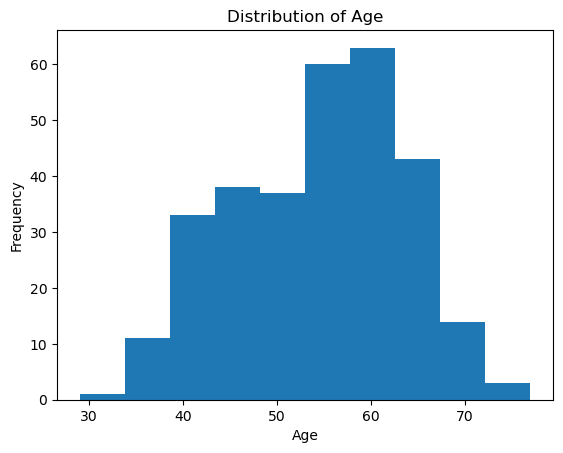

In [23]:
# Check the distribution of age column with a histogram
df.age.plot.hist()
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

In [24]:
#Heart Disease frequency based on Chest Pain Type
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


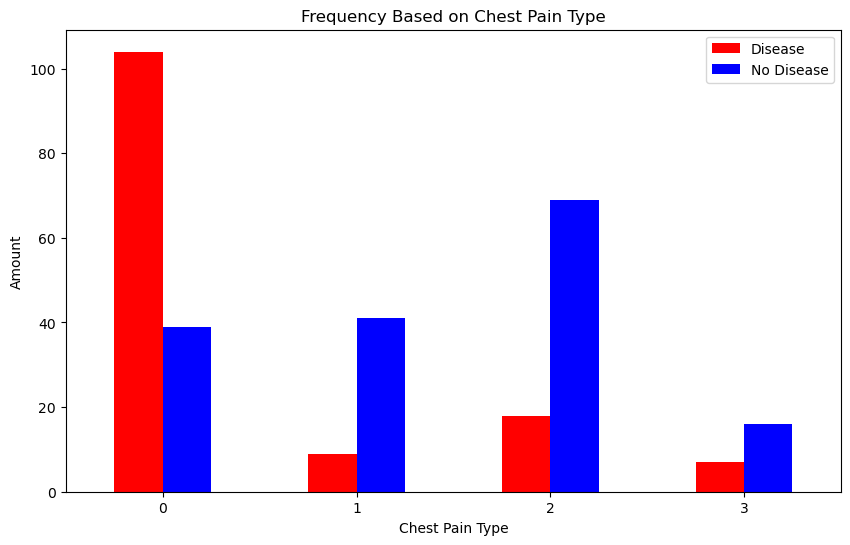

In [26]:
# Visualizing the crosstab
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["red","blue"])
plt.title("Frequency Based on Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["Disease", "No Disease"])
plt.xticks(rotation=0)
plt.show()

In [27]:
# Make a Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


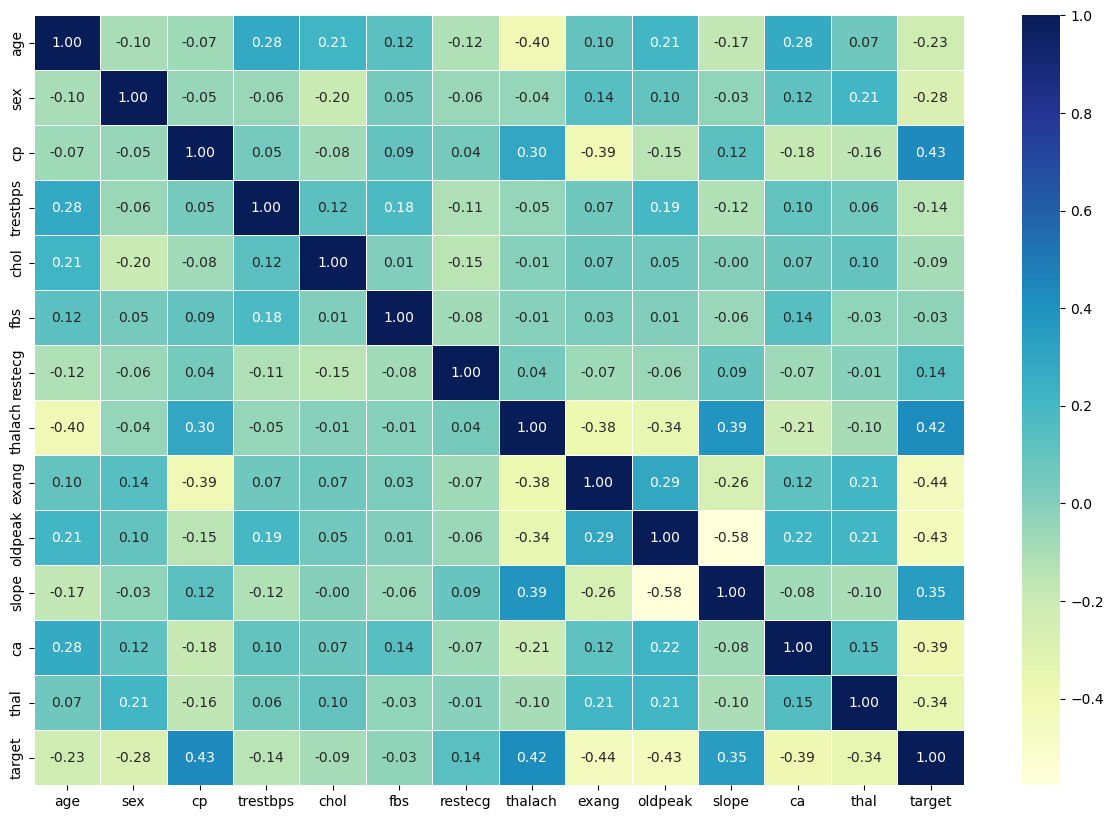

In [28]:
# Visualizing the correlation matrix
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")
plt.show()

In [29]:
## Prdiction 0 --- Healthy Heart
## 1 --- Unhealthy Heart
# Everything except the target variable
X = df.drop(labels="target", axis=1)

In [32]:
Y = df.target

In [33]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [34]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [35]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [61]:
## Splitting the data into training and testing data to train the model
## test data is 20% of the data
## Stratify is used to divide the data equally between train and test to overcome the possibility of the train having all targets with 0 or the test having all targets with 1 or vice verse
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=2)

In [62]:
X.shape

(303, 13)

In [63]:
X_train.shape

(212, 13)

In [64]:
X_test.shape

(91, 13)

In [65]:
## Model Training

In [66]:
## Using Logistic Regression, which is very useful for Binary Classification.Applicable for differentiating between Healthy and Unhealthy Heart
model = LogisticRegression()

In [67]:
## training model with train data
model.fit(X_train,Y_train)

C:\Users\User\Downloads\sample_project_1\heart_pro\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
## Model Evaluation

In [69]:
## Accuracy on Training Data
X_train_prediction = model.predict(X_train)
training_accuracy = accuracy_score(X_train_prediction,Y_train)

In [70]:
training_accuracy

0.8443396226415094

In [71]:
## Accuracy on Test Data
X_test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction,Y_test)

In [72]:
test_accuracy

0.8461538461538461

In [73]:
## Building a predictive system

In [80]:
## Taking user input for the features to check their Heart condition

age = int(input("Please enter your age: "))
sex = input("Please enter your gender (M for Male or F for Female): ")
cp = int(input("Enter chest pain type (0-3): "))
trestbps = int(input("Enter Resting Blood Pressure: "))
chol = int(input("Enter Serum Cholesterol: "))
fbs = int(input("Enter Fasting Blood Sugar (1 = true, 0 = false): "))
restecg = int(input("Enter Resting ECG results (0-2): "))
thalach = int(input("Enter Maximum heart rate achieved: "))
exang = int(input("Exercise induced angina (1 = yes, 0 = no): "))
oldpeak = float(input("Enter ST depression (float): "))
slope = int(input("Enter slope of ST segment (0-2): "))
ca = int(input("Enter number of major vessels (0-3): "))
thal = int(input("Enter Thalium stress result: "))

# Convert 'sex' to numerical (assuming your model uses 1 for male, 0 for female)
if sex.upper() == 'M':
    sex = 1
else:
    sex = 0

# Create input tuple
input_data = (age, sex, cp, trestbps, chol, fbs, restecg,
              thalach, exang, oldpeak, slope, ca, thal)
# Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
## Reshaping the numpy array as we are predicting,for instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
prediction

Please enter your age:  63
Please enter your gender (M for Male or F for Female):  M
Enter chest pain type (0-3):  3
Enter Resting Blood Pressure:  145
Enter Serum Cholesterol:  233
Enter Fasting Blood Sugar (1 = true, 0 = false):  1
Enter Resting ECG results (0-2):  0
Enter Maximum heart rate achieved:  150
Exercise induced angina (1 = yes, 0 = no):  0
Enter ST depression (float):  2.0
Enter slope of ST segment (0-2):  0
Enter number of major vessels (0-3):  0
Enter Thalium stress result:  1


C:\Users\User\Downloads\sample_project_1\heart_pro\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [79]:
if(prediction[0] == 0):
    print("The person has no Heart Disease")
else:
    print("The person is suffering from Heart Disease")

The person is suffering from Heart Disease
